# Applied Machine Learning Project

<font size=4 color='Blue'>Harsh Sharma

# Classification Problem : Next month defaulter identification of Credit Card users.
In this project we take data of Credit Card users of Taiwan and try to find default payments in next month based on data of last 6 months.

The source of the dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

The data includes 30000 listings and 24 columns - including "default payment next month", which we are trying to predict.

# <font size=2, color='Green'> Import required packages

In [3]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

# <font size=2 color='Green'> Code Used for inserting null values in dataset.

`import numpy as np`
    
`import pandas as pd`

`credit = pd.read_excel('Credit_cards.xls')`

`new_header = credit.iloc[0] #grab the first row for the header`
    
`credit = credit[1:] #take the data less the header row`
    
`credit.columns = new_header #set the header row as the df header`

`for i in range(len(credit.columns)-1):`
    
`   for j in range(1,30000,30):    `
    
`        if(i%2==0 and i%3==0 and j<29900):`
                                             
`            credit.iat[j+50,i]=np.nan`
                                             
`        elif(i%5==0 ):`
                                             
`            credit.iat[j,i]=np.nan`
                                             
`        elif(i%7==0 and j>100):`
    
`            credit.iat[j-75,i]=np.nan`
    
`        elif(j<29650):`
                         
`            credit.iat[j+250,i]=np.nan`

# <font size=2, color='Green'> Load Credit card dataset.

In [4]:
credit = pd.read_csv('Credit_card.csv')

# <font size=2, color='Green'> Understanding Data

In [5]:
credit.shape

(30000, 25)

In [6]:
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,2.0,2.0,2.0,NaN,-1.0,2.0,0.0,0.0,...,NaN,3455.0,3261.0,0.0,1000.0,NaN,1000.0,0.0,2000.0,1
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# <font size=2, color='Green'> Checking for null values

In [7]:
credit.isna().sum() #displays count of null values in all columns

ID                            1000
LIMIT_BAL                      989
SEX                            989
EDUCATION                      989
MARRIAGE                       989
AGE                           1000
PAY_0                          997
PAY_2                         1000
PAY_3                          989
PAY_4                          989
PAY_5                         1000
PAY_6                          989
BILL_AMT1                      997
BILL_AMT2                      989
BILL_AMT3                     1000
BILL_AMT4                     1000
BILL_AMT5                      989
BILL_AMT6                      989
PAY_AMT1                       997
PAY_AMT2                       989
PAY_AMT3                      1000
PAY_AMT4                      1000
PAY_AMT5                       989
PAY_AMT6                       989
default payment next month       0
dtype: int64

# <font size=2, color='Green'> Null values in total rows.

In [8]:
credit.isnull().any(axis=1).sum()

3982

# <font size=2, color='Green'> Renaming target column

In [9]:
credit=credit.rename(columns = {'default payment next month':'will_default'})

# <font size=2, color='Green'> Removed all rows which has any column value as Null.

In [10]:
credit = credit.dropna(how='any',axis=0) 

In [11]:
credit.shape

(26018, 25)

In [12]:
credit.isna().sum()

ID              0
LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
will_default    0
dtype: int64

# <font size=2, color='Green'> Droping column "ID" as it won't be part of any classification algorithm.

In [13]:
credit.drop('ID',axis=1, inplace=True)

In [14]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26018 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LIMIT_BAL     26018 non-null  float64
 1   SEX           26018 non-null  float64
 2   EDUCATION     26018 non-null  float64
 3   MARRIAGE      26018 non-null  float64
 4   AGE           26018 non-null  float64
 5   PAY_0         26018 non-null  float64
 6   PAY_2         26018 non-null  float64
 7   PAY_3         26018 non-null  float64
 8   PAY_4         26018 non-null  float64
 9   PAY_5         26018 non-null  float64
 10  PAY_6         26018 non-null  float64
 11  BILL_AMT1     26018 non-null  float64
 12  BILL_AMT2     26018 non-null  float64
 13  BILL_AMT3     26018 non-null  float64
 14  BILL_AMT4     26018 non-null  float64
 15  BILL_AMT5     26018 non-null  float64
 16  BILL_AMT6     26018 non-null  float64
 17  PAY_AMT1      26018 non-null  float64
 18  PAY_AMT2      26018 non-nu

# <font size=2, color='Green'> Executing One hot encoder on column "Marriage".

In [15]:
enc= OneHotEncoder()
credit_new= enc.fit_transform(credit[['MARRIAGE']]).toarray()
column_name=enc.get_feature_names(['Marriage'])
credit_ohc=pd.DataFrame(credit_new,columns=column_name)

In [16]:
credit_final=pd.concat([credit.reset_index(),credit_ohc], axis=1, sort=False)

In [17]:
credit_final

,index,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,will_default,Marriage_0.0,Marriage_1.0,Marriage_2.0,Marriage_3.0
0,0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,689.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0
1,2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0,0.0,1.0,0.0
2,3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0,1.0,0.0,0.0
3,4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,36681.0,10000.0,9000.0,689.0,679.0,0,0.0,1.0,0.0,0.0
4,5,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,1815.0,657.0,1000.0,1000.0,800.0,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26013,29995,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,20000.0,5003.0,3047.0,5000.0,1000.0,0,0.0,1.0,0.0,0.0
26014,29996,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,3526.0,8998.0,129.0,0.0,0.0,0,0.0,0.0,1.0,0.0
26015,29997,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,0.0,22000.0,4200.0,2000.0,3100.0,1,0.0,0.0,1.0,0.0
26016,29998,80000.0,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,3409.0,1178.0,1926.0,52964.0,1804.0,1,0.0,1.0,0.0,0.0


In [18]:
credit_final.drop(['index','MARRIAGE'],axis=1, inplace=True)

In [19]:
credit_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26018 entries, 0 to 26017
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LIMIT_BAL     26018 non-null  float64
 1   SEX           26018 non-null  float64
 2   EDUCATION     26018 non-null  float64
 3   AGE           26018 non-null  float64
 4   PAY_0         26018 non-null  float64
 5   PAY_2         26018 non-null  float64
 6   PAY_3         26018 non-null  float64
 7   PAY_4         26018 non-null  float64
 8   PAY_5         26018 non-null  float64
 9   PAY_6         26018 non-null  float64
 10  BILL_AMT1     26018 non-null  float64
 11  BILL_AMT2     26018 non-null  float64
 12  BILL_AMT3     26018 non-null  float64
 13  BILL_AMT4     26018 non-null  float64
 14  BILL_AMT5     26018 non-null  float64
 15  BILL_AMT6     26018 non-null  float64
 16  PAY_AMT1      26018 non-null  float64
 17  PAY_AMT2      26018 non-null  float64
 18  PAY_AMT3      26018 non-nu

# <font size=2, color='Green'> Scaling columns using MinMax scaler after splitting data into Train and Test.
<font size=2, color='Green'> Used MinMax scaler because PAY_AMT, BILL_AMT, PAY, and LIMIT_BAL columns are way too big in comparision to columns like Marriage, SEX, EDUCATION.
That's why I wanted all feature values in range of [0,1].

In [20]:
X_train, X_test, y_train, y_test = train_test_split(credit_final.drop("will_default",axis=1),credit_final["will_default"],random_state=0)

In [23]:
sc=MinMaxScaler()
x_train_sc= pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
x_test_sc= pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns)

# <font size=4 color='Blue'> KNN Classification

In [26]:
from sklearn.neighbors import KNeighborsClassifier

train_score_Array = []
test_score_Array = []

for k in range (1,21):
    knn=KNeighborsClassifier(k)
    knn.fit(x_train_sc,y_train)
    train_score_Array.append(knn.score(x_train_sc,y_train))
    test_score_Array.append(knn.score(x_test_sc,y_test))

In [27]:
param_grid_knn = {'n_neighbors': np.arange(1, 25)}
grid_search_knn = GridSearchCV(knn,param_grid_knn, return_train_score=True)
grid_search_knn.fit(x_train_sc, y_train)

means = grid_search_knn.cv_results_['mean_test_score']
stds = grid_search_knn.cv_results_['std_test_score']
for mean, std, param in zip(means, stds, grid_search_knn.cv_results_['params']):
    print(f"{round(mean,3)} (+/-{round(std*2,3)}) for {param}")
print()

0.73 (+/-0.004) for {'n_neighbors': 1}
0.788 (+/-0.006) for {'n_neighbors': 2}
0.777 (+/-0.007) for {'n_neighbors': 3}
0.796 (+/-0.005) for {'n_neighbors': 4}
0.795 (+/-0.007) for {'n_neighbors': 5}
0.804 (+/-0.007) for {'n_neighbors': 6}
0.805 (+/-0.008) for {'n_neighbors': 7}
0.806 (+/-0.007) for {'n_neighbors': 8}
0.806 (+/-0.007) for {'n_neighbors': 9}
0.807 (+/-0.008) for {'n_neighbors': 10}
0.808 (+/-0.005) for {'n_neighbors': 11}
0.809 (+/-0.006) for {'n_neighbors': 12}
0.809 (+/-0.009) for {'n_neighbors': 13}
0.809 (+/-0.007) for {'n_neighbors': 14}
0.81 (+/-0.01) for {'n_neighbors': 15}
0.81 (+/-0.008) for {'n_neighbors': 16}
0.81 (+/-0.01) for {'n_neighbors': 17}
0.81 (+/-0.01) for {'n_neighbors': 18}
0.81 (+/-0.01) for {'n_neighbors': 19}
0.81 (+/-0.01) for {'n_neighbors': 20}
0.81 (+/-0.011) for {'n_neighbors': 21}
0.809 (+/-0.009) for {'n_neighbors': 22}
0.81 (+/-0.01) for {'n_neighbors': 23}
0.809 (+/-0.007) for {'n_neighbors': 24}



In [28]:

knn_train_pred = grid_search_knn.predict(x_train_sc)
print(f'The training score after tuning is {(round(accuracy_score(y_train, knn_train_pred),3))}')

print("The scores are then computed on the full evaluation set.")
print()

y_true, knn_pred = y_test, grid_search_knn.predict(x_test_sc) 
print(classification_report(y_true, knn_pred))
print()

knn_accuracy = round(accuracy_score(y_test, knn_pred),3)
print(f'Accuracy obtained using KNN model with best tuned parameter from GridSearchCV: {knn_accuracy}')

knn_precision =  round(precision_score(y_test, knn_pred, labels=np.unique(knn_pred)),3)
print(f'Precision obtained using KNN model with best tuned parameter from GridSearchCV: {knn_precision}')

knn_recall =  round(recall_score(y_test, knn_pred),3)
print(f'Recall using KNN model with best tuned parameter: {knn_recall}')

knn_f1score =  round(f1_score(y_test, knn_pred,average='weighted', labels=np.unique(knn_pred)),3)
print(f'f1 score using KNN model with best tuned parameter: {knn_f1score}')
    

The training score after tuning is 0.824
The scores are then computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5059
           1       0.62      0.30      0.41      1446

    accuracy                           0.80      6505
   macro avg       0.73      0.62      0.64      6505
weighted avg       0.78      0.80      0.78      6505


Accuracy obtained using KNN model with best tuned parameter from GridSearchCV: 0.804
Precision obtained using KNN model with best tuned parameter from GridSearchCV: 0.625
Recall using KNN model with best tuned parameter: 0.302
f1 score using KNN model with best tuned parameter: 0.777


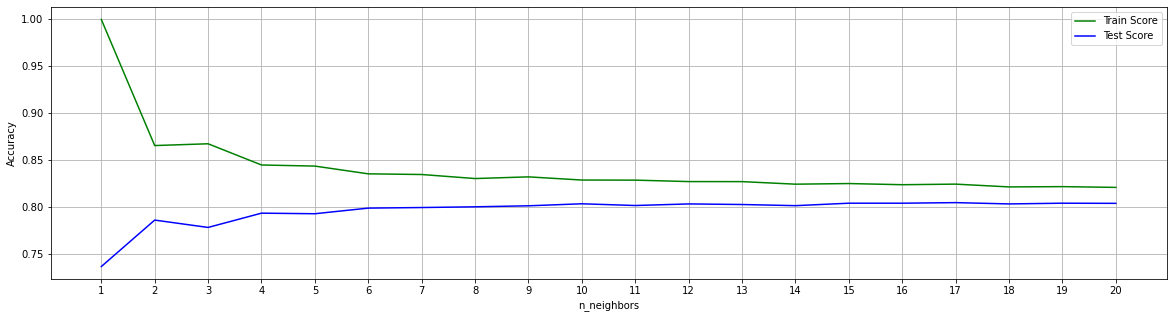

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

x_axis = range(1,21)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_Array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_Array, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(x_axis)
plt.grid()
plt.legend()

In [31]:
knn_model = grid_search_knn.best_estimator_
model_filename = 'KNN.pickle'
pickle.dump(knn_model, open(model_filename,'wb'))

# <font size=4 color='Blue'> Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear', max_iter = 500)
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'lbfgs', max_iter = 500)
    log_l1.fit(x_train_sc, y_train)
    log_l2.fit(x_train_sc, y_train)
    train_score_l1.append(log_l1.score(x_train_sc, y_train))
    train_score_l2.append(log_l2.score(x_train_sc, y_train))
    test_score_l1.append(log_l1.score(x_test_sc, y_test))
    test_score_l2.append(log_l2.score(x_test_sc, y_test))

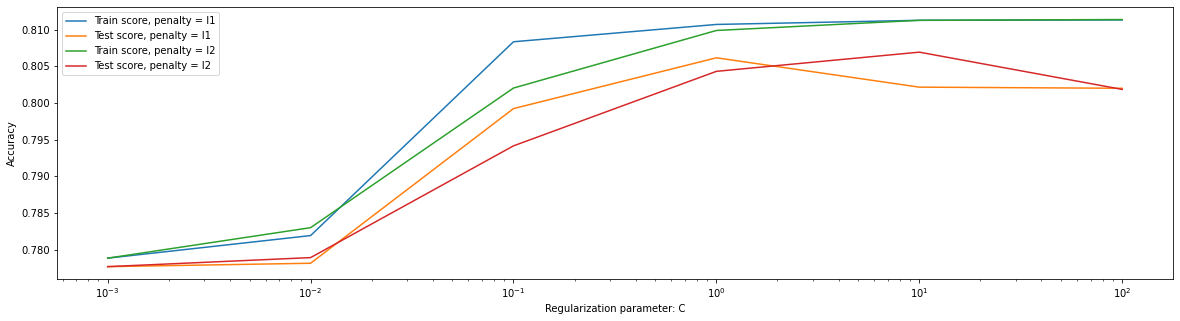

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [34]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search_logistic = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search_logistic.fit(x_train_sc, y_train)

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [35]:
# print best parameter after tuning 
print(grid_search_logistic.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_logistic.best_estimator_) 

{'C': 100, 'penalty': 'l2'}
LogisticRegression(C=100)


In [36]:
from sklearn import metrics
logistic=LogisticRegression(penalty = 'l2', C = 100, solver = 'lbfgs', max_iter = 500)
logistic.fit(x_train_sc,y_train)
y_pred=logistic.predict(x_test_sc)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4655,  404],
       [ 885,  561]], dtype=int64)

In [37]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

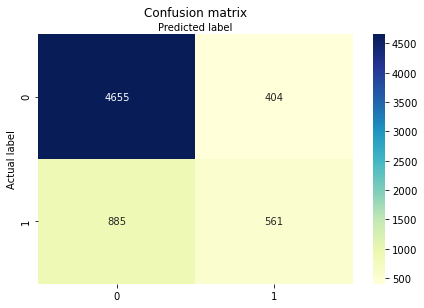

In [38]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
y_true, logistic_pred = y_test, grid_search_logistic.predict(x_test_sc) 
print(classification_report(y_true, logistic_pred))

print("Accuracy:",metrics.accuracy_score(y_test, logistic_pred))
print("Precision:",metrics.precision_score(y_test, logistic_pred))
print("Recall:",metrics.recall_score(y_test, logistic_pred))
print()

logistic_accuracy = round(accuracy_score(y_test, logistic_pred),3)
print(f'Accuracy obtained using logistic model with best tuned parameter from GridSearchCV: {logistic_accuracy}')

logistic_precision =  round(precision_score(y_test, logistic_pred, labels=np.unique(logistic_pred)),3)
print(f'Precision obtained using logistic model with best tuned parameter from GridSearchCV: {logistic_precision}')

logistic_recall =  round(recall_score(y_test, logistic_pred),3)
print(f'Recall using logistic model with best tuned parameter: {logistic_recall}')

logistic_f1score =  round(f1_score(y_test, logistic_pred,average='weighted', labels=np.unique(logistic_pred)),3)
print(f'f1 score using logistic model with best tuned parameter: {logistic_f1score}')

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      5059
           1       0.62      0.35      0.45      1446

    accuracy                           0.81      6505
   macro avg       0.73      0.64      0.67      6505
weighted avg       0.79      0.81      0.79      6505

Accuracy: 0.8073789392774788
Precision: 0.616969696969697
Recall: 0.35200553250345784

Accuracy obtained using logistic model with best tuned parameter from GridSearchCV: 0.807
Precision obtained using logistic model with best tuned parameter from GridSearchCV: 0.617
Recall using logistic model with best tuned parameter: 0.352
f1 score using logistic model with best tuned parameter: 0.787


In [40]:
logistic_model = grid_search_logistic.best_estimator_
model_filename = 'logistic.pickle'
pickle.dump(logistic_model, open(model_filename,'wb'))

# <font size=4 color='Blue'> Linear SVC

In [41]:
from sklearn.svm import LinearSVC
train_score_svm=[]
test_score_svm=[]
clf = LinearSVC(max_iter=10000, penalty='l2',dual=False,random_state=0)
clf.fit(X_train,y_train)
train_score_svm.append(clf.score(x_train_sc,y_train))
test_score_svm.append(clf.score(x_test_sc,y_test))

In [42]:
print(train_score_svm)
print(test_score_svm)

[0.7824014759391175]
[0.7818601076095312]


In [43]:

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  
grid_search_svc = GridSearchCV(clf,param_grid,cv=6, return_train_score=True)
grid_search_svc.fit(x_train_sc, y_train)

GridSearchCV(cv=6,
             estimator=LinearSVC(dual=False, max_iter=10000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [44]:
# print best parameter after tuning 
print(grid_search_svc.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_svc.best_estimator_) 

{'C': 100}
LinearSVC(C=100, dual=False, max_iter=10000, random_state=0)


In [77]:
y_true, svc_pred = y_test, grid_search_svc.predict(x_test_sc) 
print(classification_report(y_true, svc_pred))
print()

print("Accuracy:",metrics.accuracy_score(y_true, svc_pred))
print("Precision:",metrics.precision_score(y_true, svc_pred))
print("Recall:",metrics.recall_score(y_true, svc_pred))

svc_accuracy = round(accuracy_score(y_test, svc_pred),3)
print(f'Accuracy obtained using svc model with best tuned parameter from GridSearchCV: {svc_accuracy}')

svc_precision =  round(precision_score(y_test, svc_pred, labels=np.unique(svc_pred)),3)
print(f'Precision obtained using svc model with best tuned parameter from GridSearchCV: {svc_precision}')

svc_recall =  round(recall_score(y_test, svc_pred),3)
print(f'Recall using svc model with best tuned parameter: {svc_recall}')

svc_f1score =  round(f1_score(y_test, svc_pred,average='weighted', labels=np.unique(svc_pred)),3)
print(f'f1 score using svc model with best tuned parameter: {svc_f1score}')
    

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5059
           1       0.62      0.33      0.43      1446

    accuracy                           0.81      6505
   macro avg       0.73      0.64      0.66      6505
weighted avg       0.78      0.81      0.78      6505


Accuracy: 0.8066102997694081
Precision: 0.6230366492146597
Recall: 0.32918395573997233
Accuracy obtained using svc model with best tuned parameter from GridSearchCV: 0.807
Precision obtained using svc model with best tuned parameter from GridSearchCV: 0.623
Recall using svc model with best tuned parameter: 0.329
f1 score using svc model with best tuned parameter: 0.783


In [46]:
svc_model = grid_search_svc.best_estimator_
model_filename = 'svc.pickle'
pickle.dump(svc_model, open(model_filename,'wb'))

# <font size=4 color='Blue'> Kerenilzed Support Vector Machine

# <font size=4 color='Blue'> poly

In [47]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

clf_poly = SVC(kernel = 'poly')
clf_poly.fit(x_train_sc,y_train)

SVC(kernel='poly')

In [48]:
param_grid = {'C': [0.01, 0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['poly']}  
grid_search_poly = GridSearchCV(clf_poly,param_grid,cv=6, return_train_score=True)
grid_search_poly.fit(x_train_sc, y_train)

GridSearchCV(cv=6, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['poly']},
             return_train_score=True)

In [49]:
# print best parameter after tuning 
print(grid_search_poly.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_poly.best_estimator_) 

{'C': 10, 'gamma': 1, 'kernel': 'poly'}
SVC(C=10, gamma=1, kernel='poly')


In [76]:
y_true, poly_pred = y_test, grid_search_poly.predict(x_test_sc) 
print(classification_report(y_true, poly_pred))
print()


print("Accuracy:",metrics.accuracy_score(y_true, poly_pred))
print("Precision:",metrics.precision_score(y_true, poly_pred))
print("Recall:",metrics.recall_score(y_true, poly_pred))


poly_accuracy = round(accuracy_score(y_test, poly_pred),3)
print(f'Accuracy obtained using poly model with best tuned parameter from GridSearchCV: {poly_accuracy}')

poly_precision =  round(precision_score(y_test, poly_pred, labels=np.unique(poly_pred)),3)
print(f'Precision obtained using poly model with best tuned parameter from GridSearchCV: {poly_precision}')

poly_recall =  round(recall_score(y_test, poly_pred),3)
print(f'Recall using poly model with best tuned parameter: {poly_recall}')

poly_f1score =  round(f1_score(y_test, poly_pred,average='weighted', labels=np.unique(poly_pred)),3)
print(f'f1 score using poly model with best tuned parameter: {poly_f1score}')

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      5059
           1       0.60      0.40      0.48      1446

    accuracy                           0.81      6505
   macro avg       0.72      0.66      0.68      6505
weighted avg       0.79      0.81      0.79      6505


Accuracy: 0.808608762490392
Precision: 0.6041450777202072
Recall: 0.40318118948824344
Accuracy obtained using poly model with best tuned parameter from GridSearchCV: 0.809
Precision obtained using poly model with best tuned parameter from GridSearchCV: 0.604
Recall using poly model with best tuned parameter: 0.403
f1 score using poly model with best tuned parameter: 0.794


In [51]:
poly_model = grid_search_poly.best_estimator_
model_filename = 'poly.pickle'
pickle.dump(poly_model, open(model_filename,'wb'))

# <font size=4 color='Blue'> rbf

In [52]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

clf_rbf = SVC(kernel = 'rbf')
clf_rbf.fit(x_train_sc,y_train)


SVC()

In [53]:
param_grid = {'C': [0.01, 0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}  
grid_search_rbf = GridSearchCV(clf_rbf,param_grid, cv=6, return_train_score=True)
grid_search_rbf.fit(x_train_sc, y_train)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             return_train_score=True)

In [54]:
# print best parameter after tuning 
print(grid_search_rbf.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rbf.best_estimator_) 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=10, gamma=1)


In [78]:
y_true, rbf_pred = y_test, grid_search_rbf.predict(x_test_sc) 
print(classification_report(y_true, rbf_pred))
print()


print("Accuracy:",metrics.accuracy_score(y_true, rbf_pred))
print("Precision:",metrics.precision_score(y_true, rbf_pred))
print("Recall:",metrics.recall_score(y_true, rbf_pred))


rbf_accuracy = round(accuracy_score(y_test, rbf_pred),3)
print(f'Accuracy obtained using rbf model with best tuned parameter from GridSearchCV: {rbf_accuracy}')

rbf_precision =  round(precision_score(y_test, rbf_pred, labels=np.unique(rbf_pred)),3)
print(f'Precision obtained using rbf model with best tuned parameter from GridSearchCV: {rbf_precision}')

rbf_recall =  round(recall_score(y_test, rbf_pred),3)
print(f'Recall using rbf model with best tuned parameter: {rbf_recall}')

rbf_f1score =  round(f1_score(y_test, rbf_pred,average='weighted', labels=np.unique(rbf_pred)),3)
print(f'f1 score using rbf model with best tuned parameter: {rbf_f1score}')
    

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5059
           1       0.65      0.34      0.45      1446

    accuracy                           0.81      6505
   macro avg       0.74      0.64      0.67      6505
weighted avg       0.79      0.81      0.79      6505


Accuracy: 0.8130668716372021
Precision: 0.6533333333333333
Recall: 0.338865836791148
Accuracy obtained using rbf model with best tuned parameter from GridSearchCV: 0.813
Precision obtained using rbf model with best tuned parameter from GridSearchCV: 0.653
Recall using rbf model with best tuned parameter: 0.339
f1 score using rbf model with best tuned parameter: 0.789


In [56]:
rbf_model = grid_search_rbf.best_estimator_
model_filename = 'rbf.pickle'
pickle.dump(svc_model, open(model_filename,'wb'))

# <font size=4 color='Blue'> Linear

In [57]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

clf_linear = SVC(kernel = 'linear')
clf_linear.fit(x_train_sc,y_train)

SVC(kernel='linear')

In [58]:
param_grid = {'C': [0.01, 0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear']}  
grid_search_linear = GridSearchCV(clf_linear,param_grid, cv=6, return_train_score=True)
grid_search_linear.fit(x_train_sc, y_train)

GridSearchCV(cv=6, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']},
             return_train_score=True)

In [59]:
# print best parameter after tuning 
print(grid_search_linear.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_linear.best_estimator_) 

y_true, linearsvc_pred = y_test, clf_linear.predict(x_test_sc)
print(round(accuracy_score(y_test, linearsvc_pred),3))

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVC(C=10, gamma=1, kernel='linear')
0.805


In [79]:
y_true, linear_pred = y_test, grid_search_linear.predict(x_test_sc) 
print(classification_report(y_true, linear_pred))
print()

print("Accuracy:",metrics.accuracy_score(y_true, linear_pred))
print("Precision:",metrics.precision_score(y_true, linear_pred))
print("Recall:",metrics.recall_score(y_true, linear_pred))

linear_accuracy = round(accuracy_score(y_test, linear_pred),3)
print(f'Accuracy obtained using linear model with best tuned parameter from GridSearchCV: {linear_accuracy}')

linear_precision =  round(precision_score(y_test, linear_pred, labels=np.unique(linear_pred)),3)
print(f'Precision obtained using linear model with best tuned parameter from GridSearchCV: {linear_precision}')

linear_recall =  round(recall_score(y_test, linear_pred),3)
print(f'Recall using linear model with best tuned parameter: {linear_recall}')

linear_f1score =  round(f1_score(y_test, linear_pred,average='weighted', labels=np.unique(linear_pred)),3)
print(f'f1 score using linear model with best tuned parameter: {linear_f1score}')

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5059
           1       0.69      0.24      0.35      1446

    accuracy                           0.81      6505
   macro avg       0.75      0.60      0.62      6505
weighted avg       0.79      0.81      0.77      6505


Accuracy: 0.8066102997694081
Precision: 0.6910569105691057
Recall: 0.2351313969571231
Accuracy obtained using linear model with best tuned parameter from GridSearchCV: 0.807
Precision obtained using linear model with best tuned parameter from GridSearchCV: 0.691
Recall using linear model with best tuned parameter: 0.235
f1 score using linear model with best tuned parameter: 0.767


In [61]:
linear_model = grid_search_linear.best_estimator_
model_filename = 'linear.pickle'
pickle.dump(linear_model, open(model_filename,'wb'))

# <font size=4 color='Blue'> Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion= 'entropy')
tree.fit(x_train_sc,y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(x_train_sc, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(x_train_sc, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(x_test_sc, y_test)))

Accuracy on training set: 0.824
Accuracy on test set: 0.812


In [64]:
param_grid = {'criterion': ['gini','entropy'], 'min_samples_split' : range(10,300,10), 'max_depth': range(5,30), 'max_features': ['auto', 'sqrt', 'log2'],'random_state':[0]}
grid_search_tree = GridSearchCV(tree,param_grid, cv=6, return_train_score=True)
grid_search_tree.fit(x_train_sc, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 30),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': range(10, 300, 10),
                         'random_state': [0]},
             return_train_score=True)

In [65]:
# print best parameter after tuning 
print(grid_search_tree.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_tree.best_estimator_) 

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'auto', 'min_samples_split': 290, 'random_state': 0}
DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_split=290, random_state=0)


In [80]:
y_true, tree_pred = y_test, grid_search_tree.predict(x_test_sc) 
print(classification_report(y_true, tree_pred))
print()

print("Accuracy:",metrics.accuracy_score(y_true, tree_pred))
print("Precision:",metrics.precision_score(y_true, tree_pred))
print("Recall:",metrics.recall_score(y_true, tree_pred))

tree_accuracy = round(accuracy_score(y_test, tree_pred),3)
print(f'Accuracy obtained using tree model with best tuned parameter from GridSearchCV: {tree_accuracy}')

tree_precision =  round(precision_score(y_test, tree_pred, labels=np.unique(tree_pred)),3)
print(f'Precision obtained using tree model with best tuned parameter from GridSearchCV: {tree_precision}')

tree_recall =  round(recall_score(y_test, tree_pred),3)
print(f'Recall using tree model with best tuned parameter: {tree_recall}')

tree_f1score =  round(f1_score(y_test, tree_pred,average='weighted', labels=np.unique(tree_pred)),3)
print(f'f1 score using tree model with best tuned parameter: {tree_f1score}')

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      5059
           1       0.55      0.28      0.37      1446

    accuracy                           0.79      6505
   macro avg       0.69      0.61      0.62      6505
weighted avg       0.76      0.79      0.76      6505


Accuracy: 0.78923904688701
Precision: 0.5510204081632653
Recall: 0.2800829875518672
Accuracy obtained using tree model with best tuned parameter from GridSearchCV: 0.789
Precision obtained using tree model with best tuned parameter from GridSearchCV: 0.551
Recall using tree model with best tuned parameter: 0.28
f1 score using tree model with best tuned parameter: 0.762


In [68]:
tree_model = grid_search_tree.best_estimator_
model_filename = 'tree.pickle'
pickle.dump(tree_model, open(model_filename,'wb'))

In [81]:
models = pd.DataFrame({
                'Models': ['KNN Classification','Logistic Regression','Linear SVC','Kernelized POLY','Kernelized rbf','Kernelized Linear','Decision Tree'],
                'Test Accuracy':[knn_accuracy,logistic_accuracy,svc_accuracy,poly_accuracy,rbf_accuracy,linear_accuracy,tree_accuracy] ,
                'Precision':[knn_precision,logistic_precision,svc_precision,poly_precision,rbf_precision,linear_precision,tree_precision],
                'Recall': [knn_recall,logistic_recall,svc_recall,poly_recall,rbf_recall,linear_recall,tree_recall] ,
                'f1 Score': [knn_f1score,logistic_f1score,svc_f1score,poly_f1score,rbf_f1score,linear_f1score,tree_f1score]})

models.sort_values(by='f1 Score',ascending=False)

,Models,Test Accuracy,Precision,Recall,f1 Score
3,Kernelized POLY,0.809,0.604,0.403,0.794
4,Kernelized rbf,0.813,0.653,0.339,0.789
1,Logistic Regression,0.807,0.617,0.352,0.787
2,Linear SVC,0.807,0.623,0.329,0.783
0,KNN Classification,0.804,0.625,0.302,0.777
5,Kernelized Linear,0.807,0.691,0.235,0.767
6,Decision Tree,0.789,0.551,0.280,0.762


<font size=2 color='Blue'> False Positive - Case when we predict that the user will be a defaulter next month but user pays on time.

<font size=2 color='Blue'> False Negative - Case when we predict that the user won't be a defaulter next month but user doesn't pay credit card bill.

<font size=2 color='Blue'> False Negative seems to be more problematic as company couldn't identify correct defaulters in advance and couldn't take appropriate steps.
<font size=2 color='Blue'> Although, a False positive can also impact business and company might lose some old customers due to some measures taken in advance.

# <font size=2 color='Green'>If we decide to evaluate on basis of f1 score or recall, we see Kernelized POLY gives us best f1 score and recall, Kernelized POLY gives us the best f1 score, best recall and relatively better test accuracy and precision.

# <font size=2 color='Blue'> Running best model using best parameters.

In [95]:
best_model=grid_search_poly.best_estimator_
y_pred_best=best_model.predict(x_test_sc)
y_pred_best=pd.DataFrame(y_pred_best,columns=['Predicted_will_default'])

In [96]:
best_f1score =  round(f1_score(y_test, y_pred_best,average='weighted', labels=np.unique(y_pred_best)),3)
print(f'f1 score using best model: {best_f1score}')

f1 score using best model: 0.794


In [100]:
comparision_test=pd.concat([y_test.reset_index(drop=True),y_pred_best], axis=1, sort=False)

In [103]:
comparision_test.head(15)

,will_default,Predicted_will_default
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0
